In [18]:
import numpy as np

timing_data = np.fromfile('../fluid_cpp/cmake-build-debug/CppBenchmarks.float.dat', dtype=np.dtype('float32'))
print(timing_data)

[90.243 89.806 90.792 ... 87.621 88.035 87.626]


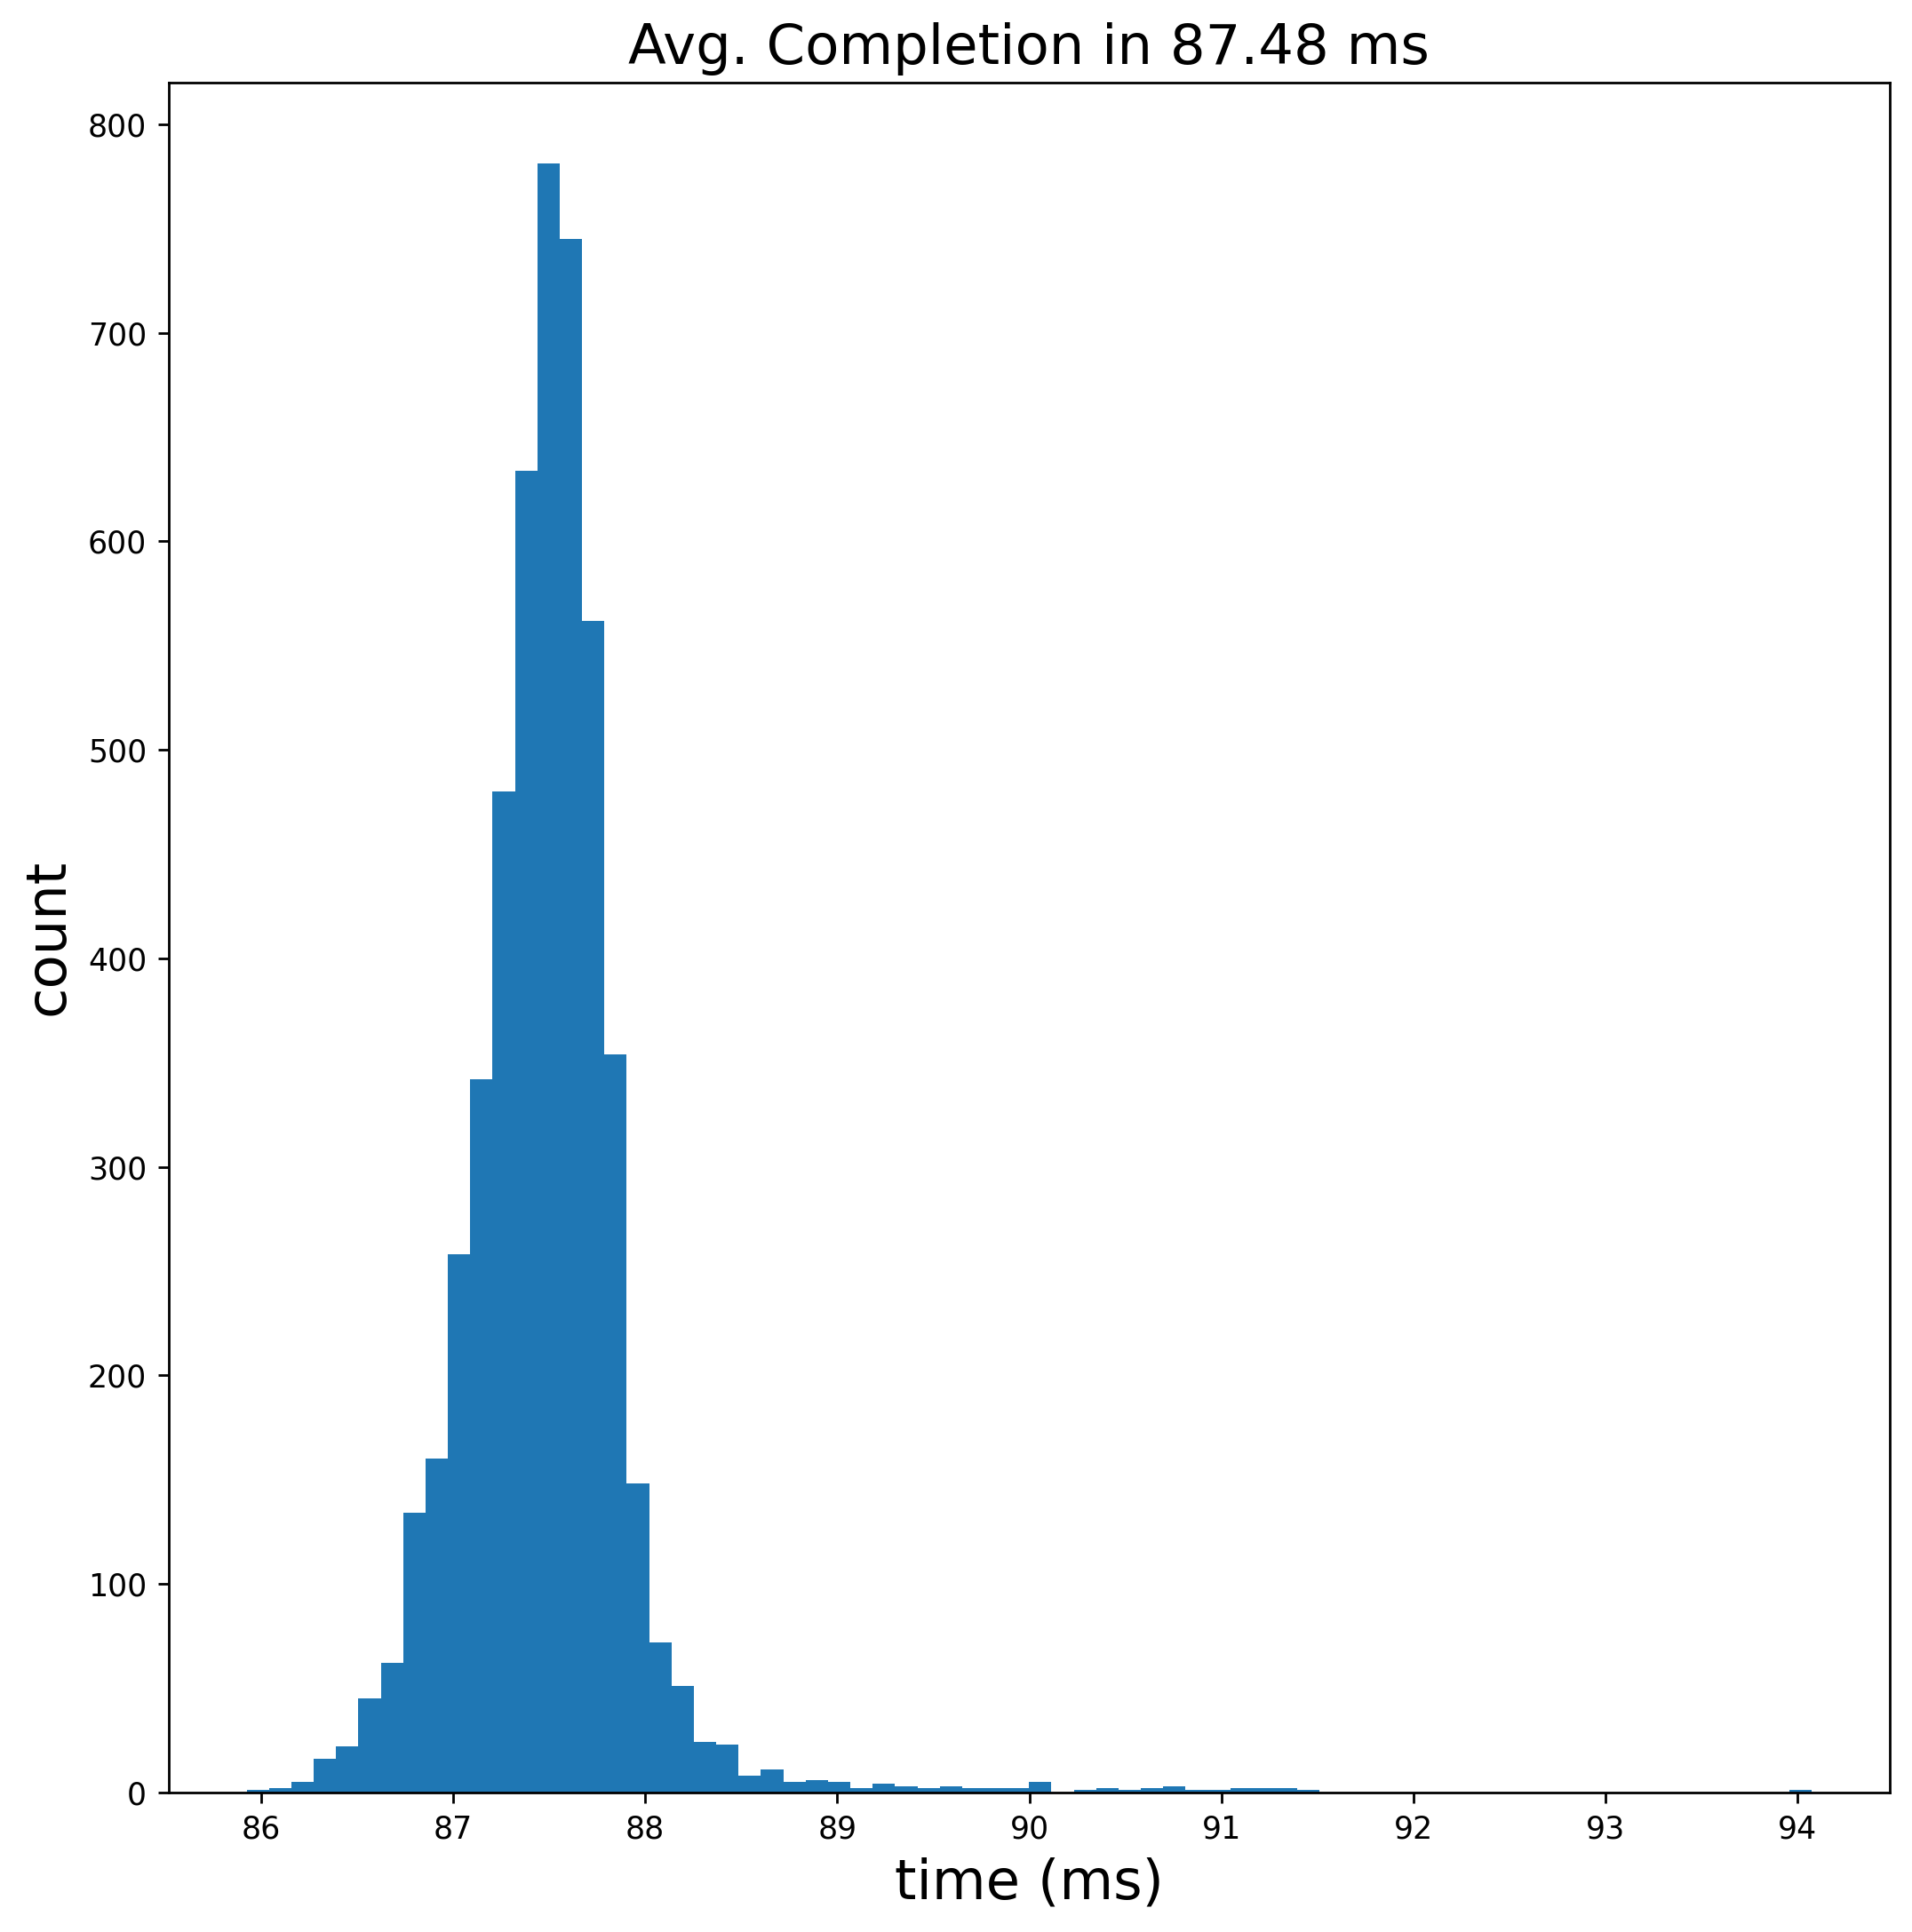

In [22]:
import matplotlib.pyplot as plt

# plot the data
plt.figure(figsize=(10, 10), dpi=250)
plt.hist(timing_data, bins=int(np.sqrt(len(timing_data))))
plt.xlabel('time (ms)', fontsize=18)
plt.ylabel('count', fontsize=18)
average = np.average(timing_data)
plt.title('Avg. Completion in {0:.2f} ms'.format(average), fontsize=18)

plt.savefig('cpp_float_benchmarks.png')